In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('credit_data.csv')

In [77]:
df.head(15)
#Данные состоят из нескольких столбцов: Возраст, DebtRaio, число займов и кредитных линий,число ипотек и заемов, связанных с недвижимостью и т.д

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2
5,0,74,0.375607,3500.0,3,1,1.0,3
6,0,57,5710.000000,NaN,8,3,0.0,3
7,0,39,0.209940,3500.0,8,0,0.0,2
8,0,27,46.000000,NaN,2,0,NaN,1
9,0,57,0.606291,23684.0,9,4,2.0,3


In [78]:
df.shape

(150000, 8)

In [79]:
#Проверка на пропуски
df.isnull().sum()

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
age_group                              0
dtype: int64

In [80]:
# Мы сбрасываем линии NA и NULL (Доходы не должны быть равны нулю, например, в строке 14.)
df.dropna(axis=0, how='any', inplace=True)
df.shape

(120269, 8)

In [81]:
# df = df[df['DebtRatio'] <= 1]

In [82]:
# Теперь лучше
df.head(20)

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2
5,0,74,0.375607,3500.0,3,1,1.0,3
7,0,39,0.209940,3500.0,8,0,0.0,2
9,0,57,0.606291,23684.0,9,4,2.0,3
10,0,30,0.309476,2500.0,5,0,0.0,1
11,0,51,0.531529,6501.0,7,2,2.0,3


In [83]:
#Доля заемщиков, которые не выплатили кредит
df['defaulted'].mean()

0.06948590243537403

In [84]:
df[df['defaulted']==1]['age'].median()

45.0

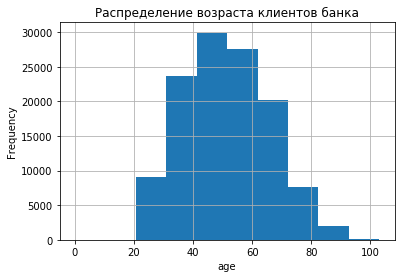

Skew: 0.22789632941978236
Mean: 51.289792049489066
Median: 51.0


In [85]:
# Средний возраст группы кредитных дефолтов моложе, чем средний возраст всех клиентов.
df['age'].plot.hist(bins=10)
plt.title('Распределение возраста клиентов банка')
plt.xlabel ('age')
plt.bins=10
plt.grid()
plt.show()
print('Skew:', stats.skew(df['age']))
print('Mean:', np.mean(df['age']))
print('Median:', np.median(df['age']))

In [86]:
# Количество заемщиков у которых среднемес доход выше среднего
(df [df.MonthlyIncome > df['MonthlyIncome'].mean()])['MonthlyIncome'].value_counts().sum()

44146

In [87]:
# Процент
(df [df.MonthlyIncome > df['MonthlyIncome'].mean()])['MonthlyIncome'].value_counts().sum() / len(df)

0.3670605060323109

In [88]:
#Заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке
df [(df.MonthlyIncome > df['MonthlyIncome'].mean()) & (df['age']>40)].describe()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
count,37629.000000,37629.000000,37629.000000,3.762900e+04,37629.000000,37629.000000,37629.000000,37629.000000
mean,0.045258,55.995934,0.310234,1.177798e+04,10.559595,1.539929,1.066571,2.656409
std,0.207871,9.944879,0.576843,2.449286e+04,5.470248,1.364122,1.240872,0.474913
min,0.000000,41.000000,0.000000,6.671000e+03,0.000000,0.000000,0.000000,2.000000
25%,0.000000,48.000000,0.156987,8.000000e+03,7.000000,1.000000,0.000000,2.000000
50%,0.000000,55.000000,0.271903,9.643000e+03,10.000000,1.000000,1.000000,3.000000
75%,0.000000,62.000000,0.400025,1.215800e+04,13.000000,2.000000,2.000000,3.000000
max,1.000000,99.000000,65.712209,3.008750e+06,58.000000,54.000000,10.000000,3.000000


In [89]:
def calculate_age_group (age) :
    if age <= 30:
        return 1
    if age <= 50:
        return 2
    else:
        return 3

In [90]:
df ['calculate_age_group']=df ['age'].apply (calculate_age_group)

In [91]:
# Разбили заемщиков на 3 группы: 1 - до 30 лет включительно, 2 - от 30 до 50, 3 - старше 50
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group,calculate_age_group
0,1,45,0.802982,9120.0,13,6,2.0,2,2
1,0,40,0.121876,2600.0,4,0,1.0,2,2
2,0,38,0.085113,3042.0,2,0,0.0,2,2
3,0,30,0.036050,3300.0,5,0,0.0,1,1
4,0,49,0.024926,63588.0,7,1,0.0,2,2


In [92]:
# Количество заемщиков в каждой новой группе
df['age_group'].value_counts()

3    60616
2    50600
1     9053
Name: age_group, dtype: int64

In [93]:
df.groupby(['age_group'])['defaulted'].mean()

age_group
1    0.111123
2    0.088538
3    0.047364
Name: defaulted, dtype: float64

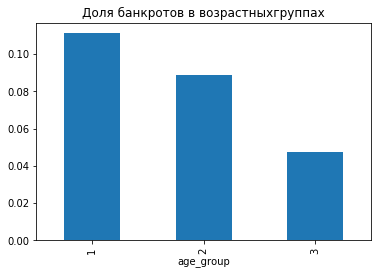

In [94]:
df.groupby(['age_group'])['defaulted'].mean().plot.bar()
plt.title('Доля банкротов в возрастныхгруппах') 
plt.show()

In [95]:
# df['NumberOfOpenCreditLinesAndLoans'].seaborn.distplot()
# Распределение числа открытых кредитных линий у клиентов банка

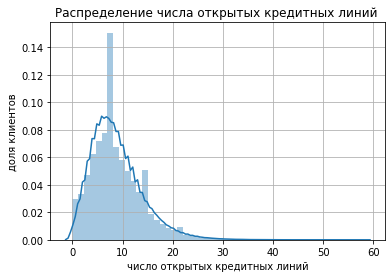

In [96]:
SBRN=df['NumberOfOpenCreditLinesAndLoans']
sns.distplot(SBRN)
plt.xlabel ('число открытых кредитных линий')
plt.ylabel ('доля клиентов')
plt.title('Распределение числа открытых кредитных линий ')
plt.grid()
plt.show()

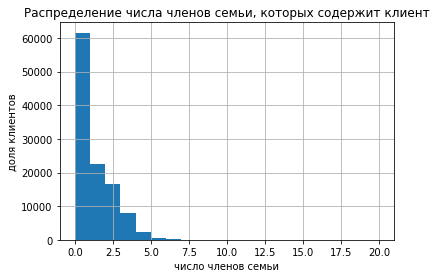

In [97]:
df[df['defaulted']==0].hist('NumberOfDependents',bins=20)
plt.title('Распределение числа членов семьи, которых содержит клиент')
plt.xlabel ('число членов семьи')
plt.ylabel ('доля клиентов')
plt.show()

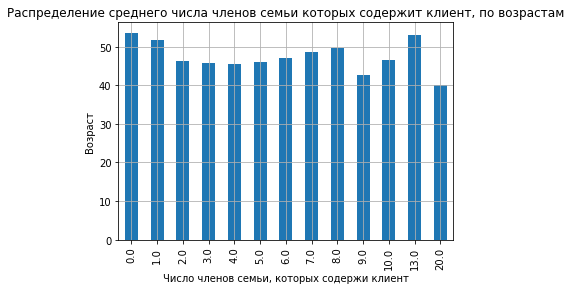

In [98]:
df.groupby(['NumberOfDependents'])['age'].mean().plot.bar()
plt.title('Распределение среднего числа членов семьи которых содержит клиент, по возрастам') 
plt.xlabel ('Число членов семьи, которых содержи клиент')
plt.ylabel ('Возраст')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Взаимосвязь между коэффициентом задолженности и возрастом')

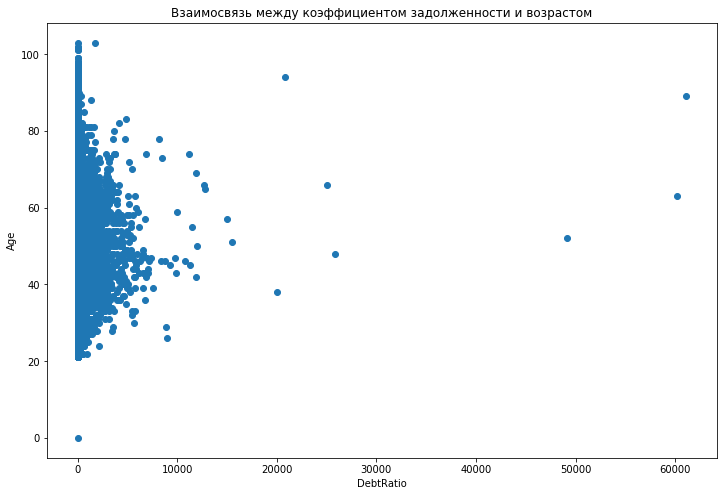

In [99]:
plt.figure(figsize=(12,8))
plt.scatter(df['DebtRatio'] ,df['age'])
plt.xlabel('DebtRatio')
plt.ylabel('Age')
plt.title('Взаимосвязь между коэффициентом задолженности и возрастом')

Text(0.5, 1.0, 'Взаимосвязь между коэффициентом задолженности и доходами')

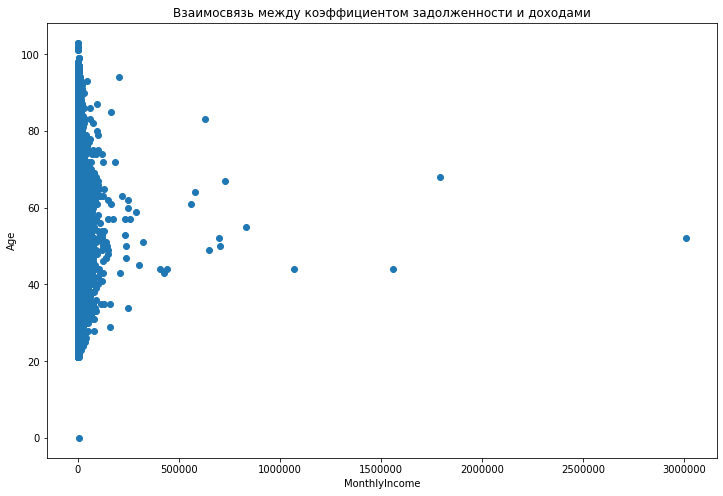

In [100]:
plt.figure(figsize=(12,8))
plt.scatter(df['MonthlyIncome'], df['age'])
plt.ylabel('Age')
plt.xlabel('MonthlyIncome')
plt.title('Взаимосвязь между коэффициентом задолженности и доходами')

In [101]:
# Корреляция однофакторной модели существенна, а доходы объясняют 16.94% тенденцию с DebtRatio соотношением
beta, alpha, r_value, p_value, std_err = stats.linregress(df['MonthlyIncome'], df['DebtRatio'])
print(beta, alpha)
print("R-squared=",abs(r_value) **0.5)
print("p-value =", p_value)

-0.0008472086369453803 32.249846488052945
R-squared= 0.16944694605552998
p-value = 2.296448763352039e-23


In [134]:
# Используйте столбец от возраста до количества в семье,
# чтобы попробовать настроить модель прогнозирования по default
features = df.loc[:, 'age' : 'NumberOfDependents']
X = features.values
y = df['defaulted']
# print('features:{} boolean:{}'.format(X.shape, y.shape))

features:(120269, 6) boolean:(120269,)


In [126]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=9)

print(X_train.shape) # 90201 samples, 30068 targets
print(X_test.shape)

(90201, 6)
(30068, 6)


In [127]:
go_default_tree = tree.DecisionTreeClassifier(max_depth=5)
go_default_tree.fit(X_train, y_train)
clf = KNeighborsClassifier()
clf.fit(X, y)
print(clf.score(X, y)) #93.19% точки правильно классифицированы

0.9318610780832967


In [132]:
# Модель обучения получает 0,9297, что хорошо.
print('Оценки:{:.6f}'.format(go_default_tree.score(X_test, y_test)))

Оценки:0.929726
